# House Prices Prediction

79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.



File descriptions:
* train.csv - the training set
* test.csv - the test set




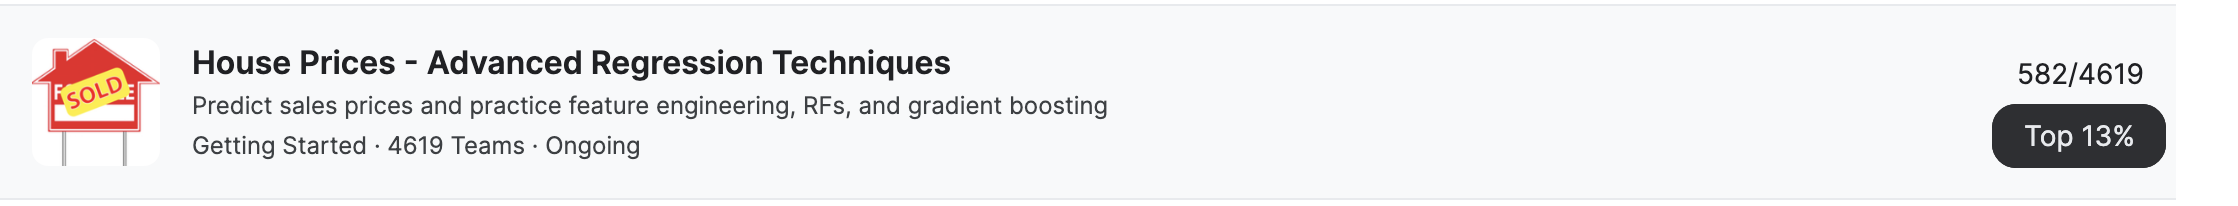

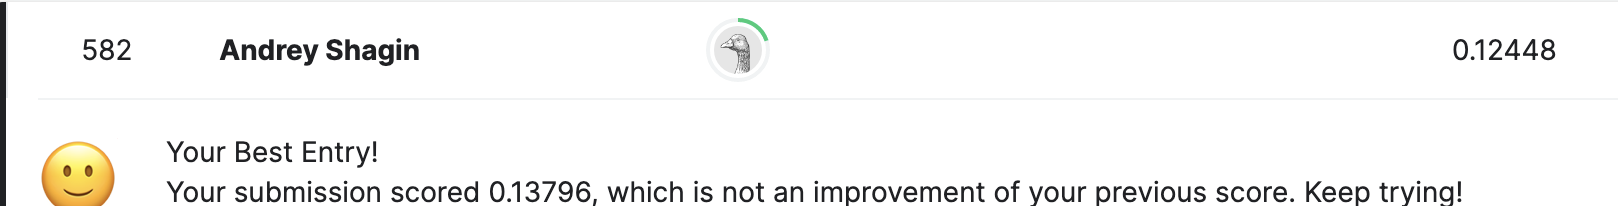

[Custom foo description](#Import)
italicized text

# Data fields

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

# Import

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_kaggle = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# Basic check

In [4]:
df.shape

(1460, 81)

In [5]:
test_kaggle.shape

(1459, 80)

In [6]:
def basic_check(df):
  display(
      '% of NaN in each column',
      df.loc[:, df.isnull().any()].isna().mean().sort_values(ascending=False),
      'Number of duplicates',
      df.duplicated().sum(),

  )

No duplicates, but a lot of missing values.   
In some columns up to 99%.  
In general there is no practical use in columns with missing values more than 40-50%, because it is hard to fill properly unless there are special instrauction in description.

In [7]:
basic_check(df)

'% of NaN in each column'

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

'Number of duplicates'

0

In [8]:
pd.options.display.max_columns = 999
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Delete all solumns with missing values more than 40% both from train(df) and test data.

In [9]:
df_nan = df.loc[:, df.isnull().any()].isna().mean().sort_values(ascending=False)

In [10]:
test_kaggle_nan = test_kaggle.loc[:, test_kaggle.isnull().any()].isna().mean().sort_values(ascending=False)

In [11]:
test_kaggle_nan[test_kaggle_nan>0.4]

PoolQC         0.997944
MiscFeature    0.965045
Alley          0.926662
Fence          0.801234
FireplaceQu    0.500343
dtype: float64

In [12]:
df_nan[df_nan>0.4]

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64

In [13]:
test_kaggle = test_kaggle.drop(test_kaggle_nan[test_kaggle_nan>0.4].index.tolist(),axis=1)

In [14]:
df = df.drop(df_nan[df_nan>0.4].index.tolist(), axis=1)

Explore correlation

In [15]:
all_corr = df.corr()

In [16]:
abs(all_corr['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

Top correlation for Sale Price are: OverallQual, GrLivArea.  
Matrix for correlation more thah 0.5

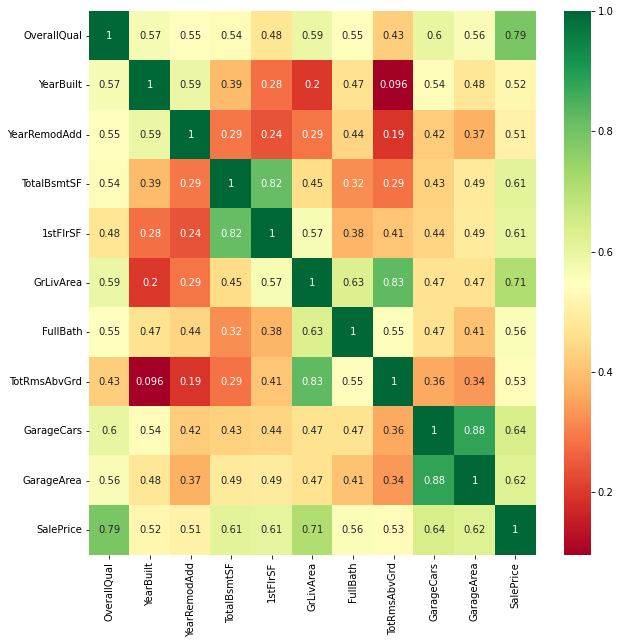

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Paiplot prove correlation, higher quality, more bath or living area - higher price

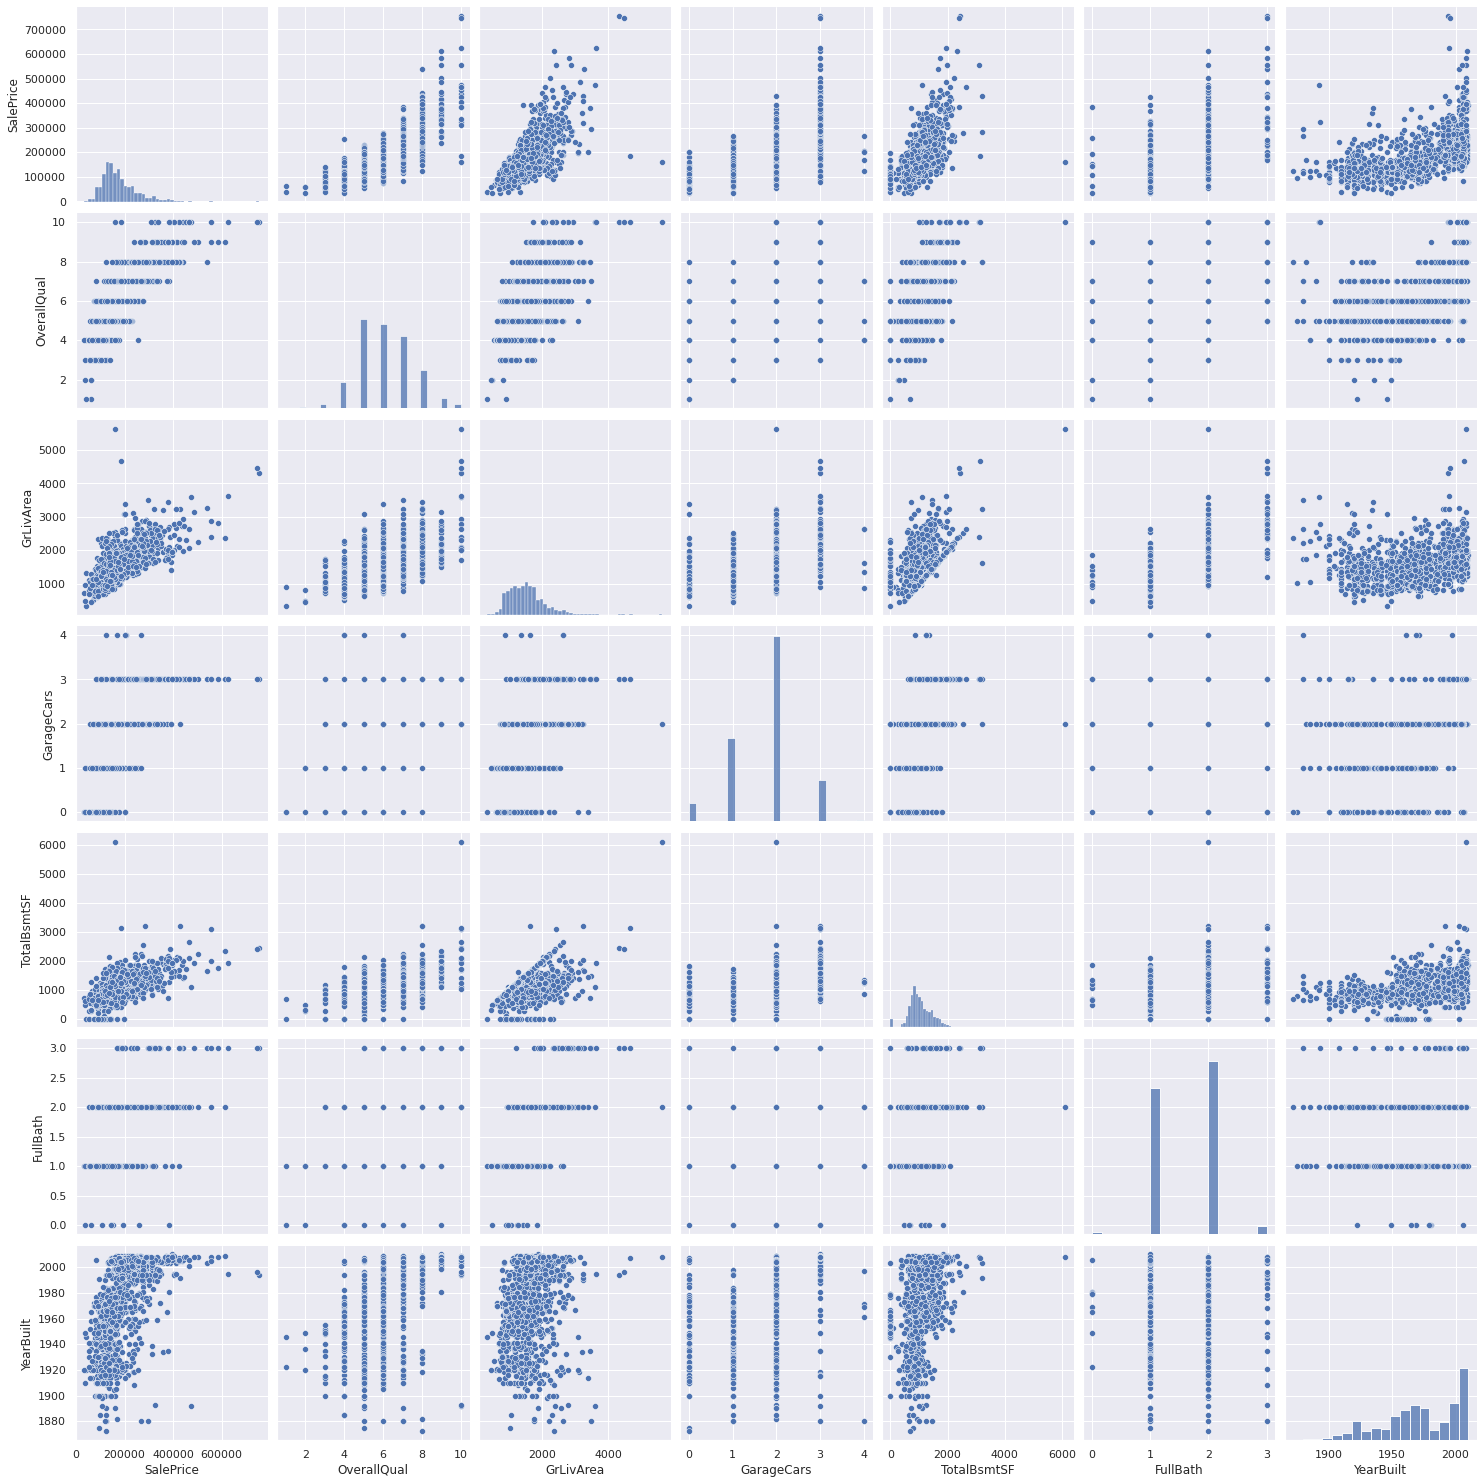

In [18]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], height = 3)
plt.show();

From plot it is clear that distribution of SalePrice skewed to the right.  
Check with Shapiro test, I choose Shapiro over Student's t-test, because there isn't normal distribution.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


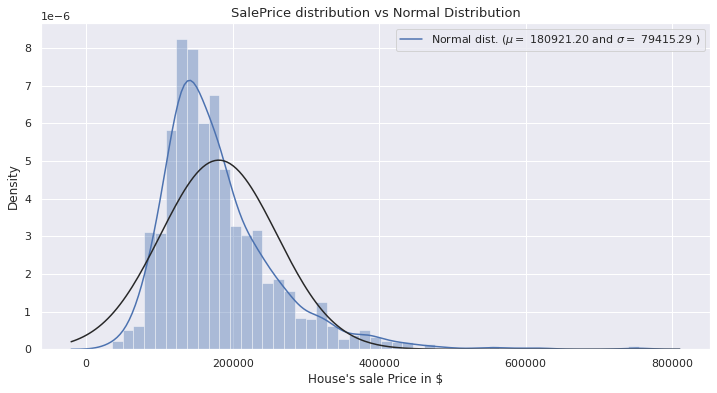

In [19]:
(mu, sigma) = norm.fit(df['SalePrice'])

plt.figure(figsize = (12,6))
sns.distplot(df['SalePrice'], kde = True, hist=True, fit = norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

From the output we can see that the test statistic is 0.8699 and the corresponding p-value is less than 0.05.  
Since the p-value is less than .05, we reject the null hypothesis.   
We have sufficient evidence to say that the sample data does not come from a normal distribution.  
According to general rules if Skewness=|0.5| and Kurtosis = |2| than values are acceptable.  
To conlude, I'll use log later to logarithm.

In [20]:
from scipy import stats

shap_t,shap_p = stats.shapiro(df['SalePrice'])

print("Skewness: %f" % abs(df['SalePrice']).skew())
print("Kurtosis: %f" % abs(df['SalePrice']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.882876
Kurtosis: 6.536282
Shapiro_Test: 0.869672
Shapiro_Test: 0.000000


Median price by year of sale.  
There not big difference, but I'll check by calculating % year to year change.

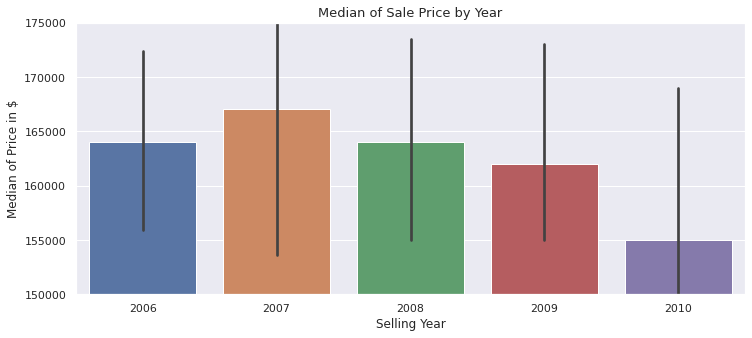

In [21]:
plt.figure(figsize = (12,5))
sns.barplot(x='YrSold', y="SalePrice", data = df, estimator = np.median)
plt.title('Median of Sale Price by Year', fontsize = 13)
plt.xlabel('Selling Year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.ylim(150000, 175000)
plt.show()

In [22]:
med_sale_year = df.groupby(['YrSold'],as_index=False)\
                  .agg({'SalePrice': ['median', 'count']})\
                  .round(0).droplevel(axis=1, level=0).reset_index(drop=True)

In [23]:
med_sale_year.columns = ['year', 'median', 'count']

In [24]:
med_sale_year['%'] = med_sale_year['median'].pct_change().fillna(0).round(2)

No big change, 1-4%, but from 2008 year there is negative trend minus 7% in 3 years.

In [25]:
med_sale_year

,year,median,count,%
0,2006,163995.0,314,0.00
1,2007,167000.0,329,0.02
2,2008,164000.0,304,-0.02
3,2009,162000.0,338,-0.01
4,2010,155000.0,175,-0.04


In [26]:
df['OverallQual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

This graph prove high correlation between overall quality and price

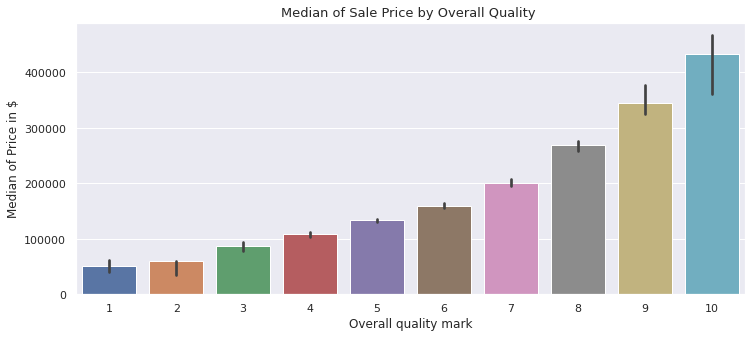

In [27]:
plt.figure(figsize = (12,5))
sns.barplot(x='OverallQual', y="SalePrice", data = df, estimator = np.median)
plt.title('Median of Sale Price by Overall Quality ', fontsize = 13)
plt.xlabel('Overall quality mark', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

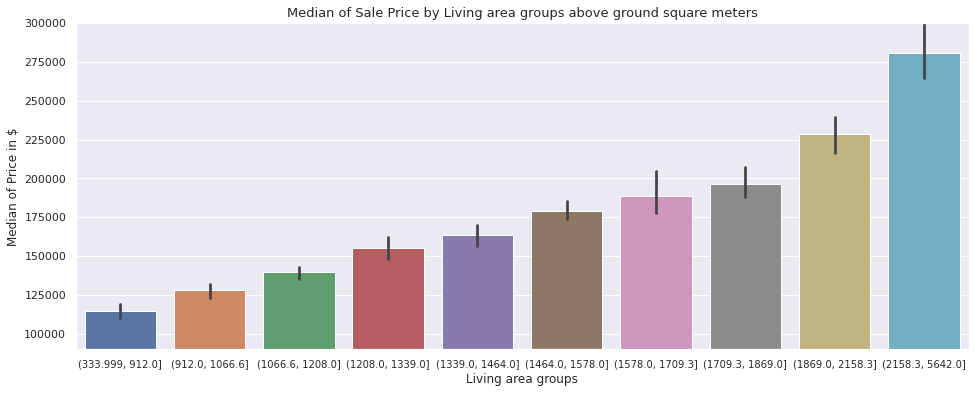

In [28]:
plt.figure(figsize = (16,6))
sns.barplot(x=pd.qcut(df.GrLivArea, q=10), y="SalePrice", data = df, estimator = np.median)
plt.title('Median of Sale Price by Living area groups above ground square meters', fontsize = 13)
plt.xlabel('Living area groups', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.ylim(90000,300000)
plt.xticks(fontsize=10)
plt.show()

# Missing values

In train(df) and test dataframes not all missing values in identical columns.  
In order not to spend time for both df and possibility of mistake, I concat them and will separate later before train_test_split

In [29]:
df.loc[:, df.isnull().any()].isna().mean().sort_values(ascending=False)

LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [30]:
test_kaggle.loc[:, test_kaggle.isnull().any()].isna().mean().sort_values(ascending=False)

LotFrontage     0.155586
GarageYrBlt     0.053461
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
Utilities       0.001371
Functional      0.001371
GarageCars      0.000685
GarageArea      0.000685
BsmtUnfSF       0.000685
KitchenQual     0.000685
TotalBsmtSF     0.000685
BsmtFinSF2      0.000685
BsmtFinSF1      0.000685
Exterior2nd     0.000685
Exterior1st     0.000685
SaleType        0.000685
dtype: float64

From df I drop target variable SalePrice, from test - 'Id' and save it, because sample submission requires 'Id'.

In [31]:
target = df['SalePrice']
test_id = test_kaggle['Id']
test_kaggle = test_kaggle.drop(['Id'],axis = 1)
df = df.drop(['SalePrice','Id'], axis = 1)


# Concatenating train & test set

train_test = pd.concat([df,test_kaggle], axis=0, sort=False)

In [32]:
train_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,7,2006,WD,Normal


In [33]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

Save all Nan columns to easier observation

In [34]:
nan_columns = train_test.loc[:, train_test.isnull().any()].isna().mean().sort_values(ascending=False).index.tolist()

In [35]:
train_test[nan_columns]

,LotFrontage,GarageYrBlt,GarageCond,GarageQual,GarageFinish,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,BsmtFinType1,MasVnrType,MasVnrArea,MSZoning,Functional,Utilities,BsmtFullBath,BsmtHalfBath,GarageArea,GarageCars,BsmtUnfSF,KitchenQual,Electrical,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,Exterior2nd,Exterior1st,SaleType
0,65.0,2003.0,TA,TA,RFn,Attchd,TA,No,Gd,Unf,GLQ,BrkFace,196.0,RL,Typ,AllPub,1.0,0.0,548.0,2.0,150.0,Gd,SBrkr,856.0,0.0,706.0,VinylSd,VinylSd,WD
1,80.0,1976.0,TA,TA,RFn,Attchd,TA,Gd,Gd,Unf,ALQ,None,0.0,RL,Typ,AllPub,0.0,1.0,460.0,2.0,284.0,TA,SBrkr,1262.0,0.0,978.0,MetalSd,MetalSd,WD
2,68.0,2001.0,TA,TA,RFn,Attchd,TA,Mn,Gd,Unf,GLQ,BrkFace,162.0,RL,Typ,AllPub,1.0,0.0,608.0,2.0,434.0,Gd,SBrkr,920.0,0.0,486.0,VinylSd,VinylSd,WD
3,60.0,1998.0,TA,TA,Unf,Detchd,Gd,No,TA,Unf,ALQ,None,0.0,RL,Typ,AllPub,1.0,0.0,642.0,3.0,540.0,Gd,SBrkr,756.0,0.0,216.0,Wd Shng,Wd Sdng,WD
4,84.0,2000.0,TA,TA,RFn,Attchd,TA,Av,Gd,Unf,GLQ,BrkFace,350.0,RL,Typ,AllPub,1.0,0.0,836.0,3.0,490.0,Gd,SBrkr,1145.0,0.0,655.0,VinylSd,VinylSd,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,NaN,NaN,NaN,NaN,NaN,TA,No,TA,Unf,Unf,None,0.0,RM,Typ,AllPub,0.0,0.0,0.0,0.0,546.0,TA,SBrkr,546.0,0.0,0.0,CmentBd,CemntBd,WD
1455,21.0,1970.0,TA,TA,Unf,CarPort,TA,No,TA,Unf,Rec,None,0.0,RM,Typ,AllPub,0.0,0.0,286.0,1.0,294.0,TA,SBrkr,546.0,0.0,252.0,CmentBd,CemntBd,WD
1456,160.0,1960.0,TA,TA,Unf,Detchd,TA,No,TA,Unf,ALQ,None,0.0,RL,Typ,AllPub,1.0,0.0,576.0,2.0,0.0,TA,SBrkr,1224.0,0.0,1224.0,VinylSd,VinylSd,WD
1457,62.0,NaN,NaN,NaN,NaN,NaN,TA,Av,Gd,Unf,GLQ,None,0.0,RL,Typ,AllPub,0.0,1.0,0.0,0.0,575.0,TA,SBrkr,912.0,0.0,337.0,Wd Shng,HdBoard,WD


Convert 'MSSubClass','YrSold','MoSold', because it is categorical.

In [36]:
list_to_str = ['MSSubClass','YrSold','MoSold']
for i in list_to_str:
    train_test[i] = train_test[i].apply(str)

In [37]:
str(nan_columns)

"['LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'MSZoning', 'Functional', 'Utilities', 'BsmtFullBath', 'BsmtHalfBath', 'GarageArea', 'GarageCars', 'BsmtUnfSF', 'KitchenQual', 'Electrical', 'TotalBsmtSF', 'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'Exterior1st', 'SaleType']"

Filling missing values

To fill 'LotFrontage' it is possible to use median, but there are Neighborhoods in city center and outside, so lot frontage will be complitely different.  
I try to use median by grouping Neighborhoods and lot area.

In [38]:
train_test['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

For such groups not enough data, even with qcut groups, there are NaNs, so I'll use just median by Neighborhoods.

In [39]:
train_test.groupby(['Neighborhood','LotArea'])['LotFrontage'].median()

Neighborhood  LotArea
Blmngtn       2938        NaN
              3010       43.0
              3013       43.0
              3072        NaN
              3087       43.0
                         ... 
Veenker       17778      94.0
              19508      95.0
              19522       NaN
              24572       NaN
              50271      68.0
Name: LotFrontage, Length: 2279, dtype: float64

In [40]:
pd.qcut(train_test.LotFrontage, q=5).value_counts()

(20.999, 53.0]    510
(53.0, 63.0]      494
(84.0, 313.0]     485
(63.0, 73.0]      472
(73.0, 84.0]      472
Name: LotFrontage, dtype: int64

In [41]:
train_test['LotFrontage_group'] = pd.qcut(train_test.LotFrontage, q=3)

In [42]:
train_test.shape

(2919, 75)

In [43]:
train_test.groupby(['Neighborhood','LotFrontage_group'])['LotFrontage'].median()

Neighborhood  LotFrontage_group
Blmngtn       (20.999, 60.0]       43.0
              (60.0, 76.0]          NaN
              (76.0, 313.0]         NaN
Blueste       (20.999, 60.0]       24.0
              (60.0, 76.0]          NaN
                                   ... 
Timber        (60.0, 76.0]         73.0
              (76.0, 313.0]        88.0
Veenker       (20.999, 60.0]       32.0
              (60.0, 76.0]         68.0
              (76.0, 313.0]        92.0
Name: LotFrontage, Length: 75, dtype: float64

In [44]:
train_test['LotFrontage'] = train_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

It won't be accurate to fill with mean, median or mode Garage year built, so I'll drop column as it not main influence feature to sale price.

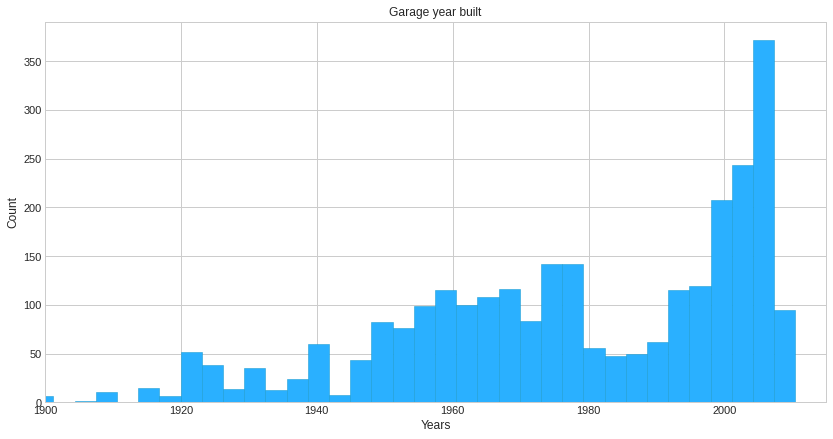

In [45]:
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(train_test['GarageYrBlt'], bins=100, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Garage year built') 
plt.xlabel('Years') 
plt.ylabel('Count') 
plt.xlim(1900,2015)
plt.show()

In [46]:
train_test = train_test.drop('GarageYrBlt',axis=1)

After I split filling missing values in 3 groups:  


*   '0' - for numerical variable, where there is no info, I consider that it is mean 'none. For example, Nan in Garage cars, mean there are no garage, so 0 cars
*   'no_info' - for categorical variables
*   in 'Functional' - there is info in description file to fill 'Typ' - typical, if Nan





In [47]:
for col in ('GarageArea', 'GarageCars', 'MasVnrArea', 'BsmtFinSF2',	'BsmtFinSF1', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF'):
    train_test[col] = train_test[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Electrical', 'KitchenQual',
            'Exterior1st', 'Exterior2nd','SaleType', 'MasVnrType', 'MSZoning', 'Utilities',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    train_test[col] = train_test[col].fillna('no_info')

#for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
#    train_test[col] = train_test[col].fillna('None')

train_test['Functional'] = train_test['Functional'].fillna('Typ')

Delete 'LotFrontage_group', It was created only for groupby.

In [48]:
train_test.loc[:, train_test.isnull().any()].isna().mean().sort_values(ascending=False)

LotFrontage_group    0.166495
dtype: float64

In [49]:
train_test = train_test.drop('LotFrontage_group', axis=1)

Final check missing values

In [50]:
train_test.isna().sum().sum()

0

Removing the useless variables - same as construction date if no remodeling or additions

In [51]:
useless = ['YearRemodAdd'] 
train_test = train_test.drop(useless, axis = 1)

Create new feaures:


*   'SqFtPerRoom' - use only above ground data to define square feet per room
*   'Total_Home_Quality' - sum of Qual and Cond


*   'Total_Bathrooms' - sum of full and half bath, for half bath there is coefficient 0.5
*   "HighQualSF" - sum of 1st and 2nd floor square feets





In [52]:
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["1stFlrSF"] + train_test["2ndFlrSF"]

Converting non-numeric predictors stored as numbers into string

In [53]:
train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)


Creating dummy variables from categorical features

In [54]:
train_test_dummy = pd.get_dummies(train_test)

Filter only numerical and choose only when skew is more than 0.5.  
For these numpy log transformation.

In [55]:
numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

For target I also use np log transformation

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


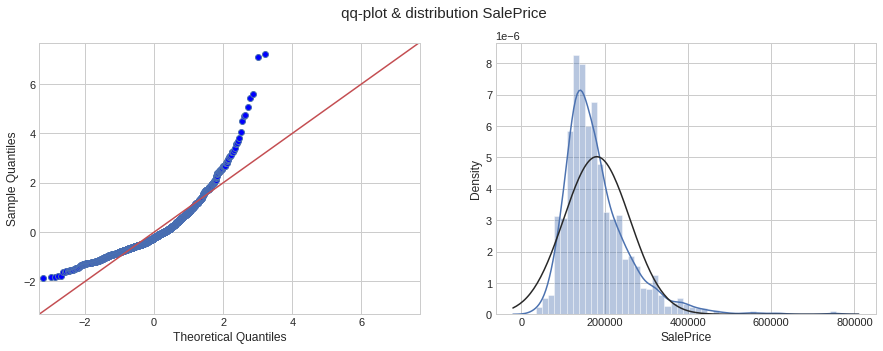

In [56]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

In [57]:
target_log = np.log1p(target)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


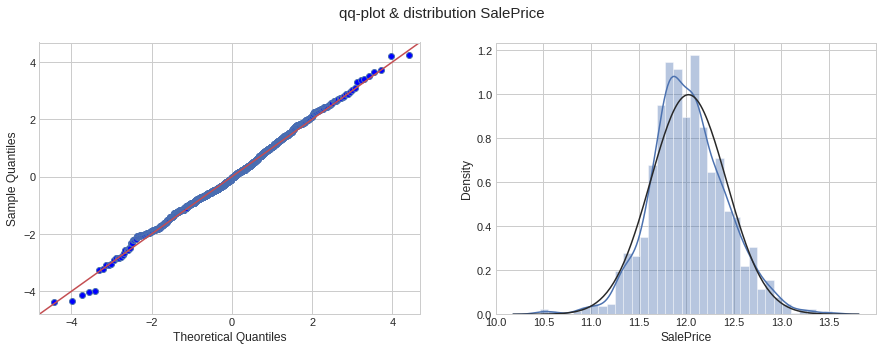

In [58]:
target_log = np.log1p(target)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

# Modeling

In [59]:
!pip install --quiet shap

     |████████████████████████████████| 575 kB 5.2 MB/s 


In [60]:
!pip install --quiet catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [61]:
import shap
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

Train-Test separation, based on there original shape.  
Add Id to test, which was saved in the beginning.

In [62]:
train = train_test_dummy[0:1460]
test = train_test_dummy[1460:]
test['Id'] = test_id

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Creation of the RMSE metric:
    


In [63]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [64]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']

# Linear Regression

lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor

l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

# Support Vector Regression

svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor

catb = CatBoostRegressor(verbose=False)
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(verbose=False),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(verbose=False),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

[14:11:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Total table with RMSE mean and standart.  
Best result with CatBoost, so I'll try to find hyperparametrs for it.

In [65]:
final_cv_score

,Regressors,RMSE_mean,RMSE_std
0,Linear_Reg.,0.134931,0.031700
1,Bayesian_Ridge_Reg.,0.125599,0.024922
2,LGBM_Reg.,0.131588,0.020140
3,SVR,0.278757,0.022400
4,Dec_Tree_Reg.,0.205279,0.028678
5,Random_Forest_Reg.,0.139848,0.023283
6,XGB_Reg.,0.130372,0.018754
7,Grad_Boost_Reg.,0.128550,0.019008
8,Cat_Boost_Reg.,0.118256,0.018838
9,Stacked_Reg.,0.118947,0.020697


Train-Test split the data

In [66]:
X_train,X_val,y_train,y_val = train_test_split(train,target_log,test_size = 0.1,random_state=42)

Cat Boost Regressor

In [67]:
cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = 0)
cat_pred = cat_model.predict(X_val)
cat_score = rmse(y_val, cat_pred)
cat_score

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.11173282682673744

Default CatBoost params

In [68]:
cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.053151000291109085,
 'score_function': '

I'll use CatBoost cv to improve result

In [69]:
from catboost import cv

In [70]:
train_data = Pool(data=train,
              label=target_log)

In [71]:
model_params = {'random_state': 42,
                'eval_metric': 'RMSE',
                'verbose': 100,
                'loss_function': 'RMSE',
                'learning_rate': 0.05}

In [72]:
cv_params = {'params': model_params,
             'pool': train_data,
             'fold_count': 3,
             'shuffle':True,
             'partition_random_seed':42,
             'verbose': 100,
             'early_stopping_rounds':200}

In [73]:
cv_data = cv(**cv_params)

Training on fold [0/3]
0:	learn: 11.4582931	test: 11.4545447	best: 11.4545447 (0)	total: 7.14ms	remaining: 7.13s
100:	learn: 0.2699816	test: 0.3743849	best: 0.3743849 (100)	total: 692ms	remaining: 6.16s
200:	learn: 0.1487020	test: 0.2956329	best: 0.2956329 (200)	total: 1.37s	remaining: 5.43s
300:	learn: 0.1107533	test: 0.2813014	best: 0.2813014 (300)	total: 2.06s	remaining: 4.79s
400:	learn: 0.0909115	test: 0.2748908	best: 0.2748908 (400)	total: 2.73s	remaining: 4.08s
500:	learn: 0.0764459	test: 0.2717452	best: 0.2717074 (498)	total: 3.42s	remaining: 3.4s
600:	learn: 0.0648236	test: 0.2697831	best: 0.2697831 (600)	total: 4.1s	remaining: 2.72s
700:	learn: 0.0552443	test: 0.2682657	best: 0.2682657 (700)	total: 4.77s	remaining: 2.04s
800:	learn: 0.0475534	test: 0.2669976	best: 0.2669972 (794)	total: 5.46s	remaining: 1.35s
900:	learn: 0.0417824	test: 0.2660235	best: 0.2660235 (900)	total: 6.12s	remaining: 672ms
999:	learn: 0.0374620	test: 0.2651134	best: 0.2651103 (994)	total: 6.79s	remain

In [74]:
model = CatBoostRegressor(**model_params)
model.fit(train, target_log)
cat_pred1 = model.predict(X_val)
cat_score1 = rmse(y_val, cat_pred1)
cat_score1

0:	learn: 0.3860767	total: 6.62ms	remaining: 6.62s
100:	learn: 0.1109138	total: 659ms	remaining: 5.87s
200:	learn: 0.0888120	total: 1.35s	remaining: 5.38s
300:	learn: 0.0759034	total: 2.04s	remaining: 4.73s
400:	learn: 0.0657442	total: 2.69s	remaining: 4.03s
500:	learn: 0.0574875	total: 3.38s	remaining: 3.37s
600:	learn: 0.0513176	total: 4.03s	remaining: 2.67s
700:	learn: 0.0459414	total: 4.69s	remaining: 2s
800:	learn: 0.0412182	total: 5.36s	remaining: 1.33s
900:	learn: 0.0370946	total: 6.03s	remaining: 663ms
999:	learn: 0.0335308	total: 6.68s	remaining: 0us


0.034026499212355066

In [75]:
pd.options.display.max_rows = 999
feature_imp = pd.DataFrame({'feature_importance': model.get_feature_importance(train_data), 
              'feature_names': train.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

Finally I'll try to cut columns with lower features importance according to CatBoost.

In [76]:
feature_imp.head(15)

,feature_importance,feature_names
2,16.883588,OverallQual
34,8.219346,HighQualSF
9,6.881418,TotalBsmtSF
13,6.747604,GrLivArea
32,6.207139,Total_Home_Quality
4,6.008693,YearBuilt
1,3.575520,LotArea
33,3.455281,Total_Bathrooms
23,3.076970,GarageArea
10,2.803940,1stFlrSF


In [77]:
cut_columns = feature_imp['feature_names'].loc[feature_imp['feature_importance']>2].tolist()

In [78]:
cut_columns

['OverallQual',
 'HighQualSF',
 'TotalBsmtSF',
 'GrLivArea',
 'Total_Home_Quality',
 'YearBuilt',
 'LotArea',
 'Total_Bathrooms',
 'GarageArea',
 '1stFlrSF',
 'BsmtFinSF1',
 'GarageCars']

In [79]:
train_data = Pool(data=train[cut_columns],
              label=target_log)

In [80]:
model_params = {'random_state': 42,
                'eval_metric': 'RMSE',
                'verbose': 100,
                'loss_function': 'RMSE',
                'learning_rate': 0.05}

In [81]:
cv_params = {'params': model_params,
             'pool': train_data,
             'fold_count': 3,
             'shuffle':True,
             'partition_random_seed':42,
             'verbose': 100,
             'early_stopping_rounds':200}

In [82]:
cv_data = cv(**cv_params)

Training on fold [0/3]
0:	learn: 11.4754308	test: 11.4742384	best: 11.4742384 (0)	total: 2.6ms	remaining: 2.6s
100:	learn: 0.2511551	test: 0.3725694	best: 0.3725694 (100)	total: 249ms	remaining: 2.22s
200:	learn: 0.1551209	test: 0.3010508	best: 0.3010508 (200)	total: 487ms	remaining: 1.94s
300:	learn: 0.1205717	test: 0.2849480	best: 0.2849480 (300)	total: 735ms	remaining: 1.71s
400:	learn: 0.1025801	test: 0.2779848	best: 0.2779739 (399)	total: 1.01s	remaining: 1.51s
500:	learn: 0.0899323	test: 0.2740220	best: 0.2740220 (500)	total: 1.25s	remaining: 1.25s
600:	learn: 0.0802687	test: 0.2727234	best: 0.2726655 (592)	total: 1.51s	remaining: 1s
700:	learn: 0.0707428	test: 0.2722594	best: 0.2721487 (635)	total: 1.75s	remaining: 746ms
800:	learn: 0.0637319	test: 0.2716303	best: 0.2714780 (739)	total: 2s	remaining: 498ms
900:	learn: 0.0572820	test: 0.2713816	best: 0.2711136 (848)	total: 2.25s	remaining: 247ms
999:	learn: 0.0512193	test: 0.2708978	best: 0.2708978 (999)	total: 2.51s	remaining: 0

In [74]:
model = CatBoostRegressor(**model_params)
model.fit(train[cut_columns], target_log)
cat_pred1 = model.predict(X_val)
cat_score1 = rmse(y_val, cat_pred1)
cat_score1

0:	learn: 0.3860135	total: 3.14ms	remaining: 3.14s
100:	learn: 0.1197642	total: 268ms	remaining: 2.39s
200:	learn: 0.1039071	total: 547ms	remaining: 2.18s
300:	learn: 0.0919477	total: 808ms	remaining: 1.88s
400:	learn: 0.0813865	total: 1.08s	remaining: 1.62s
500:	learn: 0.0739538	total: 1.36s	remaining: 1.35s
600:	learn: 0.0677256	total: 1.63s	remaining: 1.08s
700:	learn: 0.0623813	total: 1.92s	remaining: 817ms
800:	learn: 0.0574610	total: 2.17s	remaining: 540ms
900:	learn: 0.0535645	total: 2.45s	remaining: 269ms
999:	learn: 0.0500859	total: 2.71s	remaining: 0us


0.04508336027626444

No improvements, so I use previous model

In [154]:
test_pred = model.predict(test[cut_columns])
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

,Id,SalePrice
0,1461,133441.101826
1,1462,163292.316595
2,1463,179637.469423
3,1464,184774.987459
4,1465,187041.281496


In [155]:
submission.to_csv('my_submission_cb_ver7.csv', index = False)

In [156]:
from google.colab import files
files.download("my_submission_cb_ver7.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>